In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import signal as sig
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Retrieving Data

In [ ]:
def getdata(datafolder1):
  #Retrieving data from files
  dataTemp=[]
  dataA=[]
  for root , folders ,files in os.walk(datafolder1):
    files=sorted(files)
    for file2 in files:
      path= os.path.join(root,file2)
      with open(path) as file1:
        s=file1.read()
        dataTemp.append(s)
  for i in dataTemp:
     dataA.append(i.replace("\n",","))
  #spliting strings up
  delim1=","
  l=[]
  for i in dataA:
    s=i.split(delim1)
    l.append(s)
  #converting to integer arrays
  for i in range(len(l)):
    for j in range(len(l[i])):
      if(l[i][j]!=''):
        l[i][j]=int(l[i][j])
    del l[i][len(l[i])-1]
  return l


In [ ]:
dataA=getdata("/content/drive/MyDrive/Colab Notebooks/Deep Learning project/Dataset/A")
dataC=getdata("/content/drive/MyDrive/Colab Notebooks/Deep Learning project/Dataset/C")
dataE=getdata("/content/drive/MyDrive/Colab Notebooks/Deep Learning project/Dataset/E")

In [ ]:
print("Length of Dataframe-A"+"("+str(len(dataA))+","+str(len(dataA[0]))+")")
print("Length of Dataframe-C"+"("+str(len(dataC))+","+str(len(dataC[0]))+")")
print("Length of Dataframe-E"+"("+str(len(dataE))+","+str(len(dataE[0]))+")")

Length of Dataframe-A(100,4097)
Length of Dataframe-C(100,4097)
Length of Dataframe-E(100,4097)


Applying a low pass filter



Developing Filters(Lowpass,Highpass,Bandpass)

Bandpass Filter through butter filter

In [ ]:
def Bandpass(data,fs,lowcut,highcut,order):
  nyq=0.5*fs
  low=lowcut/nyq
  high=highcut/nyq
  sos=sig.butter(order,[low,high],btype='bandpass',output='sos')
  filt=sig.sosfiltfilt(sos,data)
  return filt

Lowpass Filter Implementation

In [ ]:
def Lowpass(data,fs,lowcut,order):
  nyq=0.5*fs
  low=lowcut/nyq
  sos=sig.butter(order,low,btype='lowpass',output='sos')
  filt=sig.sosfiltfilt(sos,data)
  return filt

Highpass Filter Implementation

In [ ]:
def Highpass(data,fs,highcut,order):
  nyq=0.5*fs
  high=highcut/nyq
  sos=sig.butter(order,high,btype='highpass',output='sos')
  filt=sig.sosfiltfilt(sos,data)
  return filt

Comparing section of each output

Text(0.5, 1.0, 'Unfiltered Data')

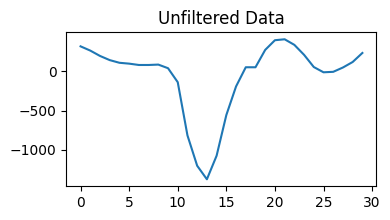

In [ ]:
plt.figure(figsize=(4,2))
plt.plot(dataA[0][30:60])
plt.title("Unfiltered Data")

Text(0.5, 1.0, 'Filtered Data')

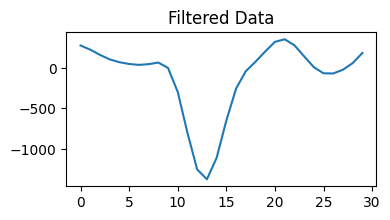

In [ ]:
fs=173.61
lowcut=0.53
highcut=40
d=Bandpass(dataA[0],fs,lowcut,highcut,order=2)
plt.figure(figsize=(4,2))
plt.plot(d[30:60])
plt.title("Filtered Data")

Modules Developed:
1. Highpass(data,fs,highcut,order)
2. Lowpass(data,fs,lowcut,order)
3. Bandpass(data,fs,lowcut,highcut,order)

Filter Settings: Order=2

In [ ]:
def Filterarr(data,fs,lowcut,highcut,order):
  L=[]
  for i in range(len(data)):
    s=Bandpass(data[i],fs,lowcut,highcut,order)
    L.insert(i,s)
  return L

In [ ]:
def Graph(data,data1,size1, size2):
  sampling_rate = 173.61  # in Hz
  n_samples = len(data[0])
  duration = n_samples / sampling_rate
  time_vector = np.linspace(0, duration, n_samples)
  plt.figure(figsize=(size1, size2))
  plt.subplot(2, 1, 1)
  plt.plot(time_vector, data[0])
  plt.title('Original Data')
  n_samples1 = len(data1[0])
  duration1 = n_samples1 / sampling_rate
  time_vector1 = np.linspace(0, duration1, n_samples1)
  plt.subplot(2, 1, 2)
  plt.plot(time_vector1, data1[0])
  plt.title('Filtered Data (0.53 - 40 Hz)')
  plt.tight_layout()
  plt.show()

In [ ]:
A=Filterarr(dataA,173.61,0.53,40,2)
C=Filterarr(dataC,173.61,0.53,40,2)
E=Filterarr(dataE,173.61,0.53,40,2)

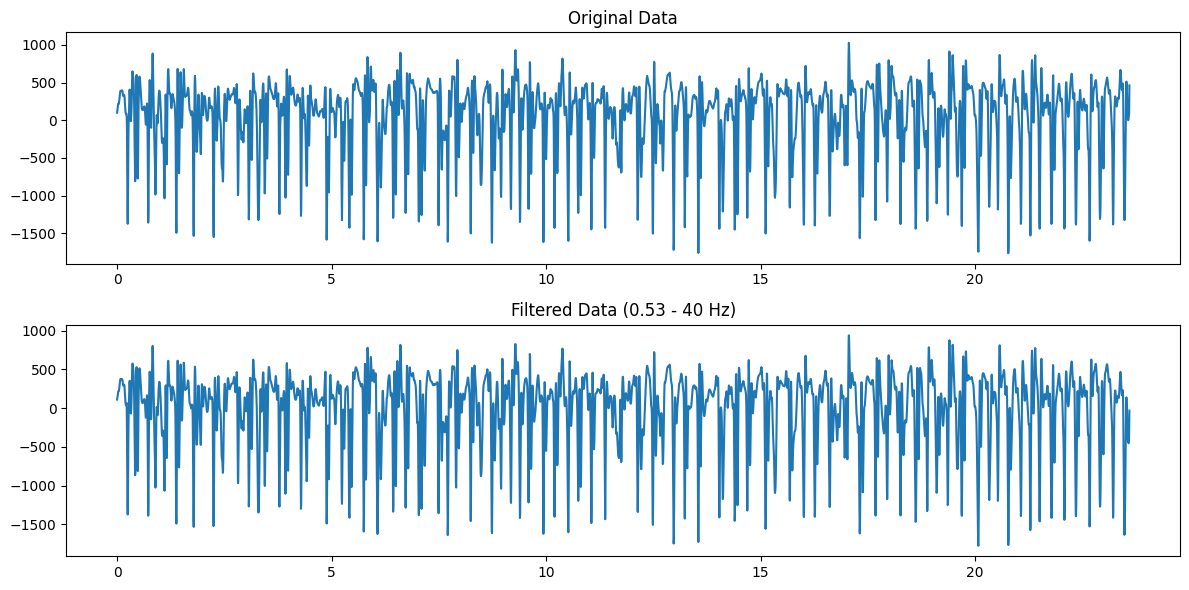

In [ ]:
Graph(dataA,A,12,6)

Seperation Of Data

In [ ]:
# def Graph1(data,data1,size1,size2):
#   sampling_rate = 173.61  # in Hz
#   n_samples = len(data[0])
#   duration = n_samples / sampling_rate
#   time_vector = np.linspace(0, duration, n_samples)
#   plt.figure(figsize=(size1, size2))
#   plt.subplot(1, 2, 1)
#   plt.plot(time_vector, data[0])
#   plt.title('Filtered Data ')
#   n_samples1 = len(data1[0])
#   duration1 = n_samples1 / sampling_rate
#   time_vector1 = np.linspace(0, duration1, n_samples1)
#   plt.subplot(1, 2, 2)
#   plt.plot(time_vector1, data1[0])
#   plt.title('Seperated Data ')
#   plt.tight_layout()
#   plt.show()

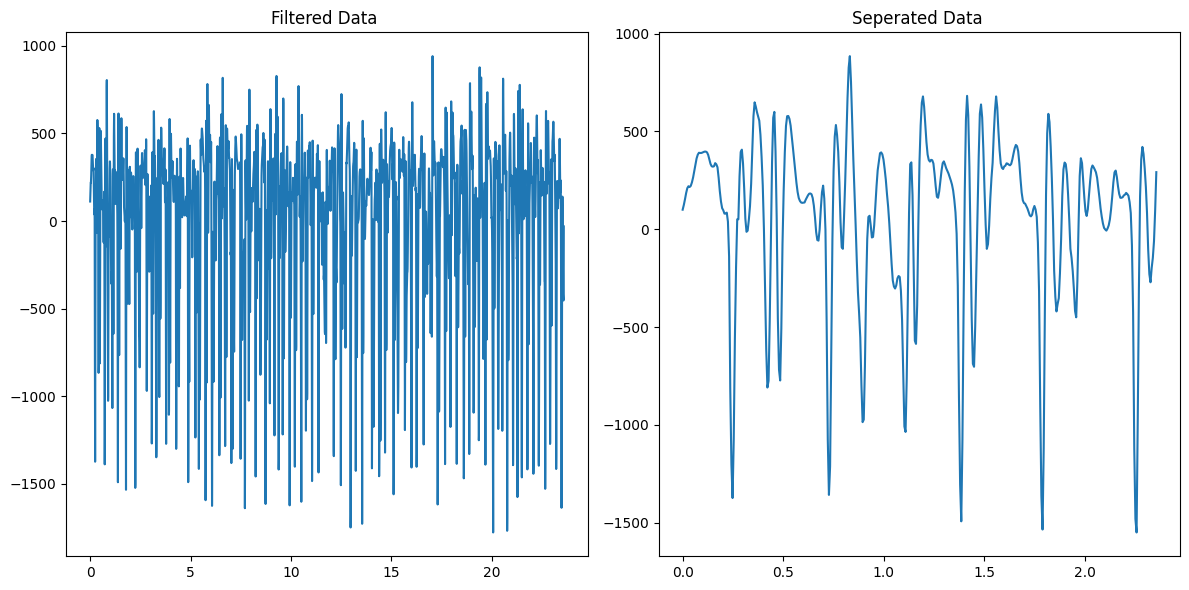

In [ ]:
# dat=dataA.copy()
# data=np.asarray(dat)
# truncated_data = data[:, :4090]  # 4090 is the largest multiple of 10 less than 4097
# # Reshape the truncated data
# result = truncated_data.reshape(100, 10, -1)
# Graph1(A,result[0],12,6)


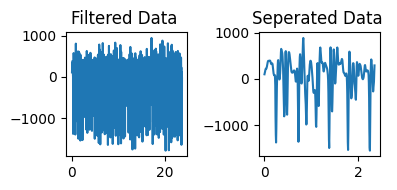

In [ ]:
# Graph1(A,result[0],4,2)

In [ ]:
def Seperation(dat):
  data=np.asarray(dat)
  truncated_data = data[:, :4090]
  result = truncated_data.reshape(100, 10, -1)
  return result


In [ ]:
def Savecnnimg(D,fol,lab):
  count=0
  labels=[]
  for i in D:
    for j in i:
      plt.figure(figsize=(4, 4))
      plt.ioff()
      plt.plot(j)
      plt.savefig('/content/drive/MyDrive/Colab Notebooks/Deep Learning project/ImageData/Images'+fol+'/plot'+fol+str(count)+'.png', dpi=56)
      plt.close()
      labels.insert(count,lab)
      count+=1
  return labels


In [ ]:
A_Final=Seperation(A)
C_Final=Seperation(C)
E_Final=Seperation(E)

In [ ]:
labelsforA=Savecnnimg(A_Final,"A","Normal(Eyes Open)")
labelsforC=Savecnnimg(C_Final,"C","Pre-Seizure Activity")
labelsforE=Savecnnimg(E_Final,"E","Seizure Activity")

In [ ]:
labels=labelsforA+labelsforC+labelsforE

In [ ]:
Images=[]
for i in range(0,1000):
  s=cv.imread("/content/drive/MyDrive/Colab Notebooks/Deep Learning project/ImageData/ImagesA/plotA"+str(i)+".png")
  # s=cv.cvtColor(s,cv.COLOR_RGB2GRAY)
  Images.insert(i,s)
count1=0
for j in range(1000,2000):
  l=cv.imread("/content/drive/MyDrive/Colab Notebooks/Deep Learning project/ImageData/ImagesC/plotC"+str(count1)+".png")
  # l=cv.cvtColor(l,cv.COLOR_RGB2GRAY)
  Images.insert(j,l)
  count1+=1
count2=0
for k in range(1000,2000):
  m=cv.imread("/content/drive/MyDrive/Colab Notebooks/Deep Learning project/ImageData/ImagesE/plotE"+str(count2)+".png")
  # m=cv.cvtColor(m,cv.COLOR_R)
  Images.insert(k,m)
  count2+=1

In [ ]:
np.save("/content/drive/MyDrive/Colab Notebooks/Deep Learning project/Backupdata/Images",Images)
np.save("/content/drive/MyDrive/Colab Notebooks/Deep Learning project/Backupdata/Labels",labels)

In [ ]:
Images=np.load("/content/drive/MyDrive/Colab Notebooks/Deep Learning project/Backupdata/Images.npy", allow_pickle=True)
Labels=np.load("/content/drive/MyDrive/Colab Notebooks/Deep Learning project/Backupdata/Labels.npy", allow_pickle=True)

In [ ]:
print(Labels)

['Normal(Eyes Open)' 'Normal(Eyes Open)' 'Normal(Eyes Open)' ...
 'Seizure Activity' 'Seizure Activity' 'Seizure Activity']


In [ ]:
def Label1(labs):
 for i in range(len(labs)):
  if(labs[i]=="Normal(Eyes Open)"):
    labs[i]=0
  elif(labs[i]=="Pre-Seizure Activity"):
    labs[i]=1
  elif(labs[i]=="Seizure Activity"):
    labs[i]=2

In [ ]:
Label1(Labels)



In [ ]:
print(Labels)

[0 0 0 ... 2 2 2]


In [ ]:
Images=np.asarray(Images)
Labels=np.asarray(Labels,dtype=np.uint8)

In [ ]:
from sklearn.utils import shuffle
Images,Labels=shuffle(Images,Labels,random_state=1)

In [ ]:
Labels12=np.asarray(Labels,dtype=np.uint8)

In [ ]:
Labels12

array([1, 2, 1, ..., 1, 0, 1], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
training_images, testing_images, training_labels, testing_labels = train_test_split(
    Images, Labels12, test_size=0.2, random_state=42, stratify=Labels
)

In [ ]:
print(testing_labels[3])

0


In [ ]:
training_images=Images[0:2400]
training_labels=Labels[0:2400]
testing_images=Images[2400:]
testing_labels=Labels[2400:]

Just during the training process

In [ ]:
final_train_images=training_images[0:1920]
val_images=training_images[1920:]
final_train_labels=training_labels[0:1920]
val_labels=training_labels[1920:]

In [ ]:
print(f"Unique labels in training: {np.unique(final_train_labels)}")
print(f"Unique labels in validation: {np.unique(val_labels)}")
print(f"Unique labels in test: {np.unique(testing_labels)}")

Unique labels in training: [0 1 2]
Unique labels in validation: [0 1 2]
Unique labels in test: [0 1 2]


In [ ]:
from collections import Counter
print(f"Training distribution: {Counter(final_train_labels)}")
print(f"Validation distribution: {Counter(val_labels)}")
print(f"Test distribution: {Counter(testing_labels)}")

Training distribution: Counter({0: 640, 2: 640, 1: 640})
Validation distribution: Counter({1: 160, 0: 160, 2: 160})
Test distribution: Counter({2: 200, 1: 200, 0: 200})


In [ ]:
final_train_images, val_images, final_train_labels, val_labels = train_test_split(
    training_images, training_labels, test_size=0.2, random_state=42, stratify=training_labels
)

In [ ]:
print(len(final_train_images))
print(len(final_train_labels))

1920
1920


Importing Modules

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


Model-1(Immitation of Literature)

In [ ]:
Inputs=keras.Input(shape=(224,224,3))
x=layers.Conv2D(32,kernel_size=3,use_bias=False)(Inputs)
x=layers.BatchNormalization()(x)
x=layers.Activation("relu")(x)
x=layers.Conv2D(32,kernel_size=3,use_bias=False)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation("relu")(x)
x=layers.Conv2D(32,kernel_size=3,use_bias=False)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation("relu")(x)
x=layers.Flatten()(x)
outputs=layers.Dense(3,activation="softmax")(x)
model1=keras.Model(Inputs,outputs)
model1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 220, 220, 32)        │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 220, 220, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 220, 220, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 218, 218, 32)        │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 218, 218, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 218, 218, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1520768)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │       4,562,307 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,581,987 (17.48 MB)

 Trainable params: 4,581,795 (17.48 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
opt1=keras.optimizers.RMSprop(learning_rate=0.001)
model1.compile(loss="sparse_categorical_crossentropy",optimizer=opt1,metrics=["accuracy"])

callbacks = [keras.callbacks.ModelCheckpoint(filepath="Model1(Basic).keras",save_best_only=True,verbose=1,monitor="val_loss")]
history = model1.fit(final_train_images,final_train_labels,epochs=15,validation_data=(val_images,val_labels),batch_size=32,callbacks=callbacks)

Epoch 1/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.4114 - loss: 334.6780
Epoch 1: val_loss improved from inf to 299.27258, saving model to Model1(Basic).keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.4126 - loss: 332.4602 - val_accuracy: 0.3333 - val_loss: 299.2726
Epoch 2/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8131 - loss: 24.8095
Epoch 2: val_loss improved from 299.27258 to 162.42894, saving model to Model1(Basic).keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.8126 - loss: 24.8928 - val_accuracy: 0.3333 - val_loss: 162.4289
Epoch 3/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8360 - loss: 27.4287
Epoch 3: val_loss did not improve from 162.42894
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.8362 - loss: 27.3618 - val_accuracy: 0.3521 - val_loss: 241.1027
Epoch 4/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9169 - loss: 10.4313
Epoch 4: val_loss did not improve from 162.42894
60/60 ━━━━━━━━━━

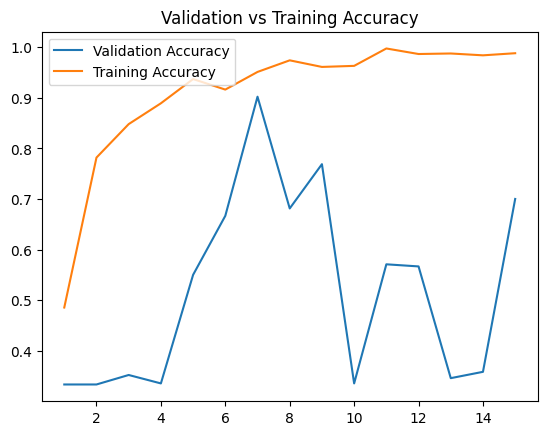

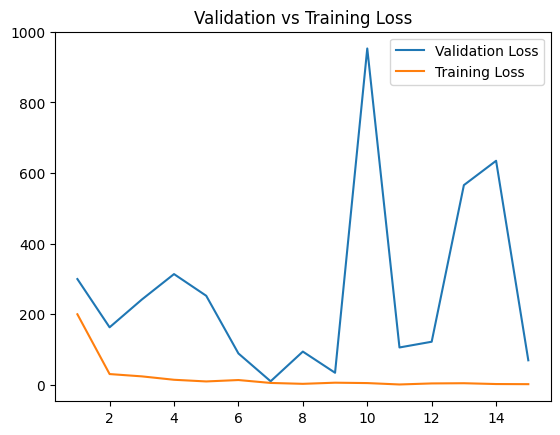

In [ ]:
#displaying validation vs training curve
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
Val_Loss=history.history['val_loss']
train_Loss=history.history['loss']
epochs=range(1,len(accuracy)+1)
import matplotlib.pyplot as plt
plt.plot(epochs,val_accuracy,label="Validation Accuracy")
plt.plot(epochs,accuracy,label="Training Accuracy")
plt.title("Validation vs Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,Val_Loss,label="Validation Loss")
plt.plot(epochs,train_Loss,label="Training Loss")
plt.title("Validation vs Training Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("Model1(Basic).keras")
test_loss, test_acc = test_model.evaluate(testing_images,testing_labels)
print(f"Test accuracy: {test_acc:.3f}")
train_loss, train_acc = test_model.evaluate(training_images,training_labels)
print(f"Training accuracy: {train_acc:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8957 - loss: 10.0129
Test accuracy: 0.902
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9724 - loss: 2.7441
Training accuracy: 0.976


In [ ]:
y_pred_probs = test_model.predict(testing_images)  # Probabilities for each class
y_pred = y_pred_probs.argmax(axis=1)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
raw_predictions = model1.predict(testing_images)
print("Raw predictions shape:", raw_predictions.shape)
print("Raw predictions sample:", raw_predictions[:5])

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Raw predictions shape: (600, 3)
Raw predictions sample: [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
predicted_classes = np.argmax(raw_predictions, axis=1)
calculated_accuracy = accuracy_score(testing_labels, predicted_classes)
print("Calculated accuracy:", calculated_accuracy)

Calculated accuracy: 0.3333333333333333


In [ ]:
print(f"Shape of predictions: {y_pred.shape}")
print(f"Shape of test labels: {testing_labels.shape}")
print(f"Unique values in predictions: {np.unique(y_pred)}")

Shape of predictions: (600,)
Shape of test labels: (600,)
Unique values in predictions: [0 1 2]


In [ ]:
# Generate a classification report
print(classification_report(testing_labels, y_pred, target_names=["0","1","2"]))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       200
           1       0.94      0.81      0.87       200
           2       0.81      0.95      0.87       200

    accuracy                           0.90       600
   macro avg       0.91      0.90      0.90       600
weighted avg       0.91      0.90      0.90       600



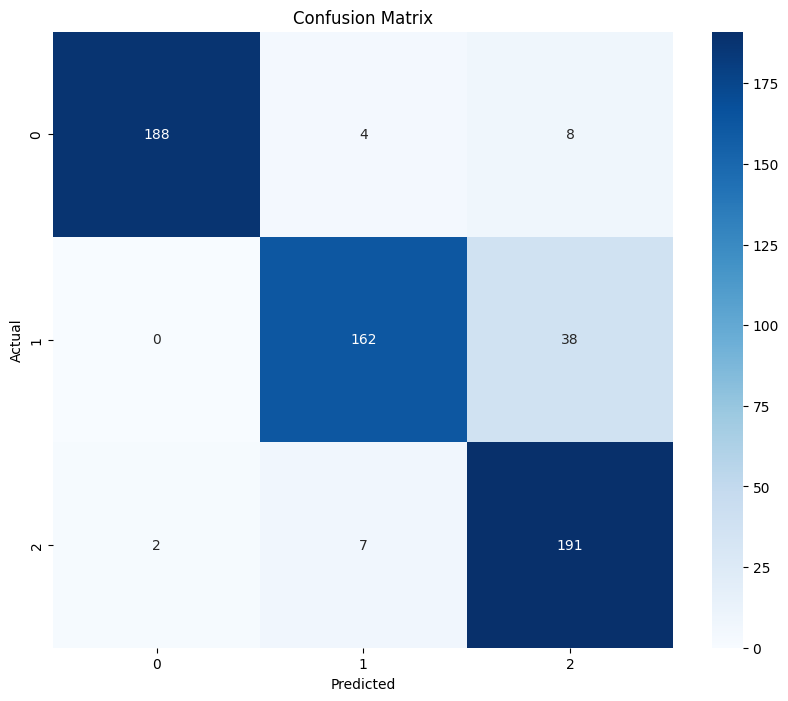

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(testing_labels, y_pred)


# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["0","1","2"], yticklabels=["0","1","2"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# test_model = keras.models.load_model("//content/drive/MyDrive/Colab Notebooks/Deep Learning project/Models/Model1(Base).keras")
# test_loss, test_acc = test_model.evaluate(testing_images,testing_labels)
# print(f"Test accuracy: {test_acc:.3f}")
# train_loss, train_acc = test_model.evaluate(training_images,training_labels)
# print(f"Training accuracy: {train_acc:.3f}")

In [ ]:
# model1.save("/content/drive/MyDrive/Colab Notebooks/Deep Learning project/Models/Model1(Base).keras")

Trying same model for more epochs

In [ ]:
Inputs=keras.Input(shape=(224,224,3))
x=layers.Conv2D(32,kernel_size=3,use_bias=False)(Inputs)
x=layers.BatchNormalization()(x)
x=layers.Activation("relu")(x)
x=layers.Conv2D(32,kernel_size=3,use_bias=False)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation("relu")(x)
x=layers.Conv2D(32,kernel_size=3,use_bias=False)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation("relu")(x)
x=layers.Dense(16)(x)
x=layers.Flatten()(x)
outputs=layers.Dense(3,activation="softmax")(x)
model2=keras.Model(Inputs,outputs)
model2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 222, 222, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 220, 220, 32)        │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 220, 220, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 220, 220, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 218, 218, 32)        │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 218, 218, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 218, 218, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 218, 218, 16)        │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 760384)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │       2,281,155 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,301,363 (8.78 MB)

 Trainable params: 2,301,171 (8.78 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
opt2=keras.optimizers.RMSprop(learning_rate=0.01)
model2.compile(loss="sparse_categorical_crossentropy",optimizer=opt2,metrics=["accuracy"])

callbacks = [keras.callbacks.ModelCheckpoint(filepath="Model2.keras",save_best_only=True,verbose=1,monitor="val_loss")]
history = model2.fit(final_train_images,final_train_labels,epochs=30,validation_data=(val_images,val_labels),batch_size=32,callbacks=callbacks)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.4917 - loss: 1088.0770
Epoch 1: val_loss improved from inf to 37703.76953, saving model to Model2.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.4935 - loss: 1078.7590 - val_accuracy: 0.1125 - val_loss: 37703.7695
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8100 - loss: 151.6149
Epoch 2: val_loss did not improve from 37703.76953
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.8094 - loss: 152.5030 - val_accuracy: 0.3333 - val_loss: 77084.5547
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.8788 - loss: 61.3432
Epoch 3: val_loss improved from 37703.76953 to 24177.16602, saving model to Model2.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.8790 - loss: 61.2894 - val_accuracy: 0.2500 - val_loss: 24177.1660
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9227 - loss: 34.0470
Epoch 4: val_loss improved from 24177.16602 to 18214.28125

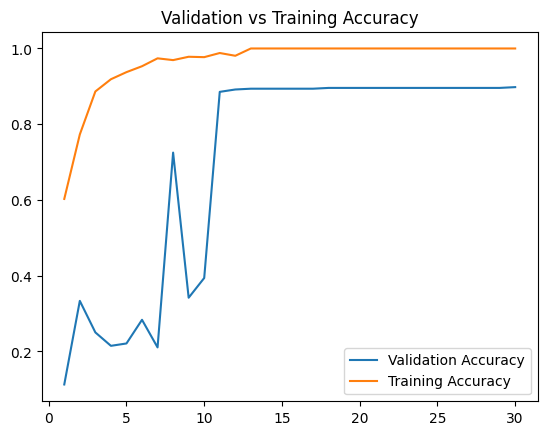

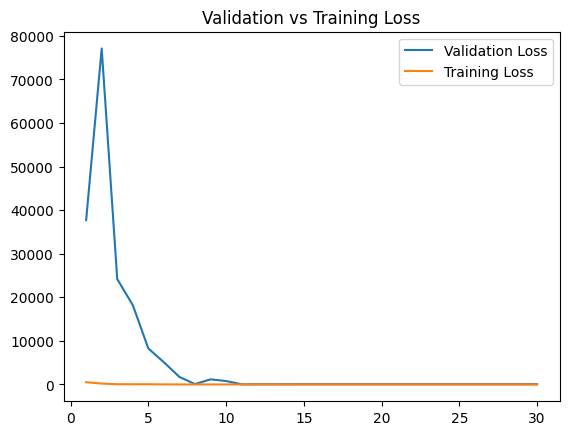

In [ ]:
#displaying validation vs training curve
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
Val_Loss=history.history['val_loss']
train_Loss=history.history['loss']
epochs=range(1,len(accuracy)+1)
import matplotlib.pyplot as plt
plt.plot(epochs,val_accuracy,label="Validation Accuracy")
plt.plot(epochs,accuracy,label="Training Accuracy")
plt.title("Validation vs Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,Val_Loss,label="Validation Loss")
plt.plot(epochs,train_Loss,label="Training Loss")
plt.title("Validation vs Training Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("Model2.keras")
test_loss, test_acc = test_model.evaluate(testing_images,testing_labels)
print(f"Test accuracy: {test_acc:.3f}")
train_loss, train_acc = test_model.evaluate(training_images,training_labels)
print(f"Training accuracy: {train_acc:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8801 - loss: 44.6421
Test accuracy: 0.893
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9614 - loss: 10.5927
Training accuracy: 0.966


In [ ]:
y_pred_probs1 = model2.predict(testing_images)  # Probabilities for each class
y_pred2 = y_pred_probs1.argmax(axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [ ]:
print(classification_report(testing_labels, y_pred2, target_names=["0","1","2"]))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       200
           1       0.81      0.91      0.86       200
           2       0.89      0.81      0.85       200

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



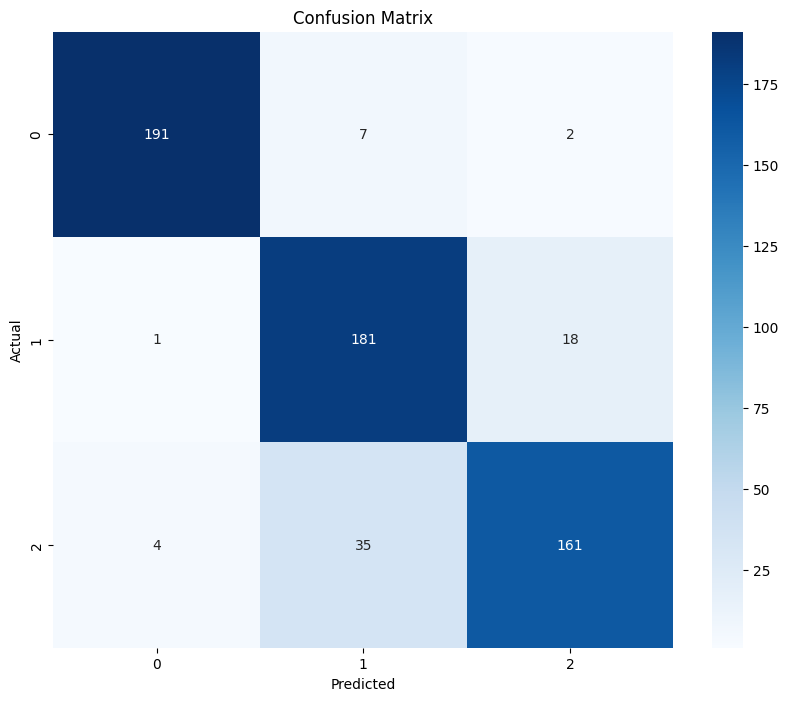

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm2 = confusion_matrix(testing_labels, y_pred2)


# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=["0","1","2"], yticklabels=["0","1","2"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# model2.save("/content/drive/MyDrive/Colab Notebooks/Deep Learning project/Models/Model2(Base-Model+Dense).keras")

Model-3

In [ ]:
Inputs=keras.Input(shape=(224, 224, 3))
x=layers.Conv2D(32,kernel_size=3,use_bias=False)(Inputs)
x=layers.BatchNormalization()(x)
x=layers.Activation("relu")(x)
x = layers.Dropout(0.2)(x)
x=layers.Conv2D(32,kernel_size=3,use_bias=False)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation("relu")(x)
x = layers.Dropout(0.2)(x)
x=layers.Conv2D(32,kernel_size=3,use_bias=False)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation("relu")(x)
x = layers.Dropout(0.2)(x)
x=layers.Dense(16)(x)
x=layers.Flatten()(x)
outputs=layers.Dense(3,activation="softmax")(x)
model3=keras.Model(Inputs,outputs)
model3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 220, 220, 32)        │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 220, 220, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 220, 220, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 220, 220, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 218, 218, 32)        │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 218, 218, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 218, 218, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 218, 218, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 218, 218, 16)        │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 760384)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │       2,281,155 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,301,363 (8.78 MB)

 Trainable params: 2,301,171 (8.78 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

opt4=keras.optimizers.Adam(learning_rate=0.0005)
model3.compile(loss="sparse_categorical_crossentropy",optimizer=opt4,metrics=["accuracy"])

callbacks = [keras.callbacks.ModelCheckpoint(filepath="model_testing_4.keras",save_best_only=True,verbose=1,monitor="val_loss")]
history = model3.fit(final_train_images,final_train_labels,epochs=30,validation_data=(val_images,val_labels),batch_size=32,callbacks=callbacks)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.3339 - loss: 27.3949
Epoch 1: val_loss improved from inf to 10.54728, saving model to model_testing_4.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 30s 147ms/step - accuracy: 0.3338 - loss: 27.1761 - val_accuracy: 0.3438 - val_loss: 10.5473
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.6064 - loss: 2.0642
Epoch 2: val_loss improved from 10.54728 to 4.32967, saving model to model_testing_4.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.6059 - loss: 2.0704 - val_accuracy: 0.3792 - val_loss: 4.3297
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.6855 - loss: 1.7050
Epoch 3: val_loss improved from 4.32967 to 3.83849, saving model to model_testing_4.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.6857 - loss: 1.7028 - val_accuracy: 0.3250 - val_loss: 3.8385
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.7918 - loss: 0.9952
Epoch 4: val_loss did not improv

Model-4(Same model-Different LR)

In [ ]:
Inputs=keras.Input(shape=(224,224,3))
x=layers.Conv2D(32,kernel_size=3,use_bias=False)(Inputs)
x=layers.BatchNormalization()(x)
x=layers.Activation("relu")(x)
x=layers.Conv2D(32,kernel_size=3,use_bias=False)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation("relu")(x)
x=layers.Conv2D(32,kernel_size=3,use_bias=False)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation("relu")(x)
x=layers.Dense(16)(x)
x=layers.Flatten()(x)
outputs=layers.Dense(3,activation="softmax")(x)
model3=keras.Model(Inputs,outputs)
model3.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 32)        │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 220, 220, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 220, 220, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 218, 218, 32)        │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 218, 218, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 218, 218, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 218, 218, 16)        │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 760384)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │       2,281,155 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,301,363 (8.78 MB)

 Trainable params: 2,301,171 (8.78 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
opt4=keras.optimizers.RMSprop(learning_rate=0.001)
model3.compile(loss="sparse_categorical_crossentropy",optimizer=opt4,metrics=["accuracy"])

callbacks = [keras.callbacks.ModelCheckpoint(filepath="Model3.keras",save_best_only=True,verbose=1,monitor="val_loss")]
history = model3.fit(final_train_images,final_train_labels,epochs=30,validation_data=(val_images,val_labels),batch_size=32,callbacks=callbacks)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.3124 - loss: 147.6831
Epoch 1: val_loss improved from inf to 249.45657, saving model to Model3.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 127ms/step - accuracy: 0.3125 - loss: 146.5785 - val_accuracy: 0.3438 - val_loss: 249.4566
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5753 - loss: 11.6238
Epoch 2: val_loss improved from 249.45657 to 108.93704, saving model to Model3.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.5753 - loss: 11.5944 - val_accuracy: 0.3208 - val_loss: 108.9370
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.7915 - loss: 3.1508
Epoch 3: val_loss improved from 108.93704 to 54.12349, saving model to Model3.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.7908 - loss: 3.1827 - val_accuracy: 0.3313 - val_loss: 54.1235
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8949 - loss: 1.1107
Epoch 4: val_loss did not improve from 54.12

In [ ]:
#displaying validation vs training curve
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
Val_Loss=history.history['val_loss']
train_Loss=history.history['loss']
epochs=range(1,len(accuracy)+1)
import matplotlib.pyplot as plt
plt.plot(epochs,val_accuracy,label="Validation Accuracy")
plt.plot(epochs,accuracy,label="Training Accuracy")
plt.title("Validation vs Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,Val_Loss,label="Validation Loss")
plt.plot(epochs,train_Loss,label="Training Loss")
plt.title("Validation vs Training Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("Model3.keras")
test_loss3, test_acc3 = test_model.evaluate(testing_images,testing_labels)
print(f"Test accuracy: {test_acc3:.3f}")
train_loss3, train_acc3 = test_model.evaluate(training_images,training_labels)
print(f"Training accuracy: {train_acc3:.3f}")